<a href="https://colab.research.google.com/github/shafilahamed/Exploratory-Data-Analysis-of-IPL-data/blob/main/Copy_of_Copy_of_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
work_dir_path='/content/drive/MyDrive/Capstone 1/IPL Data/'

In [ ]:
df_matches=pd.read_csv(work_dir_path + 'matches.csv')
df_teams=pd.read_csv(work_dir_path + 'teams.csv')
df_teamwise=pd.read_csv(work_dir_path + 'teamwise_home_and_away.csv')
df_deliveries=pd.read_csv(work_dir_path+ 'deliveries.csv')
df_mostruns=pd.read_csv(work_dir_path+ 'most_runs_average_strikerate.csv')
df_players=pd.read_excel(work_dir_path + 'Players.xlsx')

In [ ]:
df_matches.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
def change_name(data):
    if data=='Delhi Daredevils':
        data='Delhi Capitals'
    elif data=='Deccan Chargers':
        data='Sunrisers Hyderabad'
    elif data=='Pune Warriors' or data=='Rising Pune Supergiant':
        data='Rising Pune Supergiants'
    return data    

In [ ]:
df_matches['team1']=df_matches['team1'].apply(lambda x:change_name(x))
df_matches['team2']=df_matches['team2'].apply(lambda x:change_name(x))
df_matches['toss_winner']=df_matches['toss_winner'].apply(lambda x:change_name(x))
df_matches['winner']=df_matches['winner'].apply(lambda x:change_name(x))
df_deliveries['total_runs']=df_deliveries['total_runs'].apply(lambda x:change_name(x))
df_deliveries['batting_team']=df_deliveries['batting_team'].apply(lambda x:change_name(x))

In [ ]:
df_matches.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiants         27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

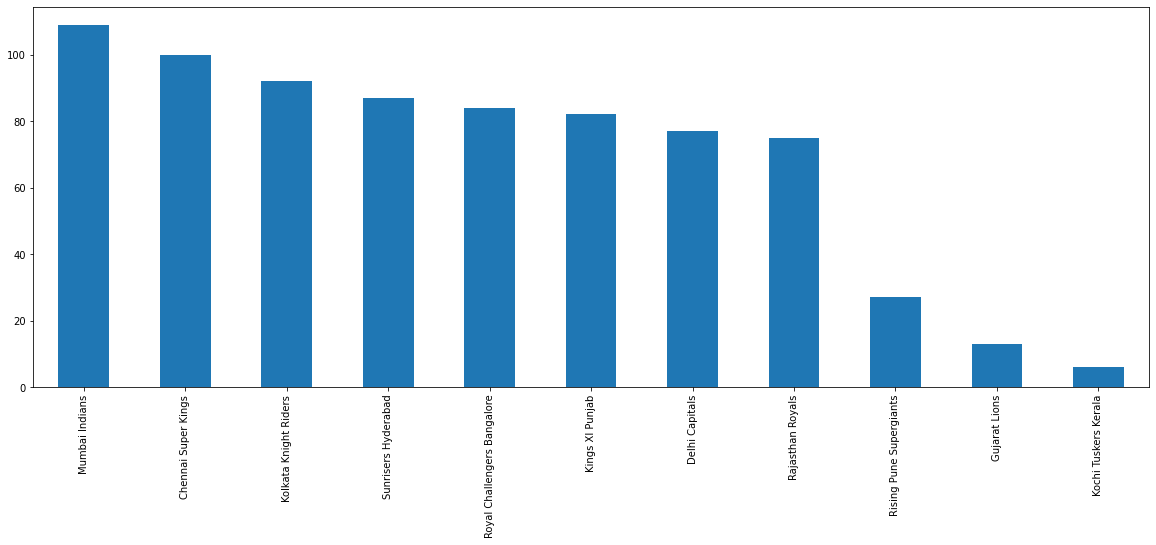

In [ ]:
plt.figure(figsize=(20,7))
wins=df_matches.winner.value_counts()
wins.plot.bar()

INFERENCE:
Mumbai Indians is the most successful team followed by Chennai Super Kings and then Kolkata Knight Riders.

In [ ]:
df_matches.player_of_match.value_counts().head(10)

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

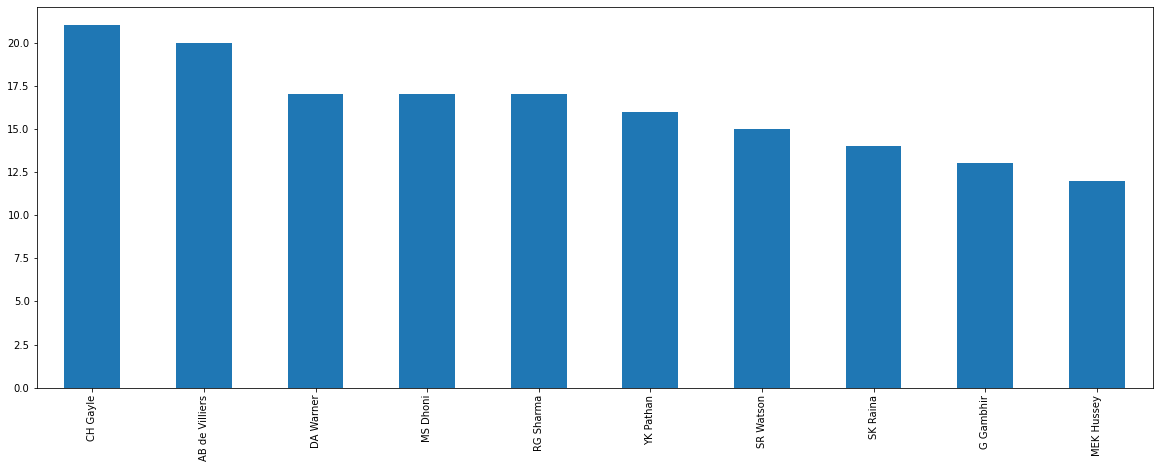

In [ ]:
plt.figure(figsize=(20,7))
df_matches.player_of_match.value_counts().head(10).plot.bar()

INFERENCE:
Chris Gayle is the most successful player in ipl history with 21 times Player of the match awarded followed by AB Devillers with 20 timeS

In [ ]:
df_matches.venue.value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

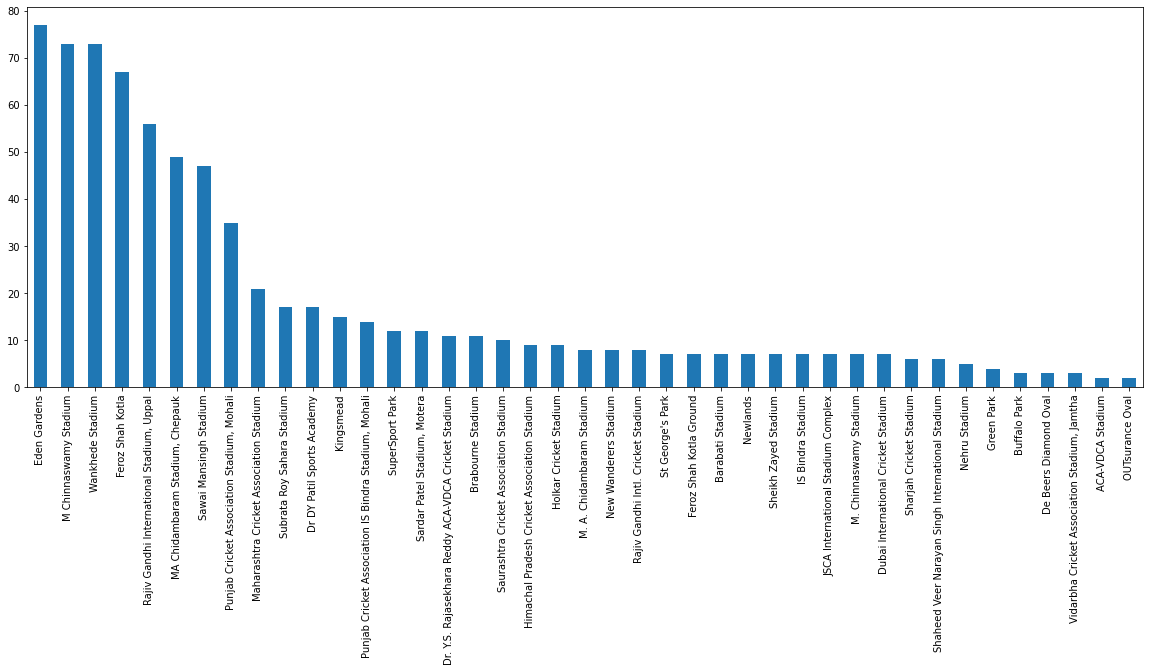

In [ ]:
plt.figure(figsize=(20,7))
df_matches.venue.value_counts().plot.bar()

INFERENCE:
Eden Gardens of kolkata has hosted most no matches of ipl of 77

**HIGHEST** **AVERAGE** **BATTING** **SCORE**

In [ ]:
print(len(df_matches[df_matches['team1']=='Chennai Super Kings']) + len(df_matches[df_matches['team2']=='Chennai Super Kings']))
print(len(df_matches[df_matches['team1']=='Mumbai Indians']) + len(df_matches[df_matches['team2']=='Mumbai Indians']))
print(len(df_matches[df_matches['team1']=='Kolkata Knight Riders']) + len(df_matches[df_matches['team2']=='Kolkata Knight Riders']))
print(len(df_matches[df_matches['team1']=='Rajasthan Royals']) + len(df_matches[df_matches['team2']=='Rajasthan Royals']))
print(len(df_matches[df_matches['team1']=='Royal Challengers Bangalore']) + len(df_matches[df_matches['team2']=='Royal Challengers Bangalore']))
print(len(df_matches[df_matches['team1']=='Kings XI Punjab']) + len(df_matches[df_matches['team2']=='Kings XI Punjab']))
print(len(df_matches[df_matches['team1']=='Sunrisers Hyderabad']) + len(df_matches[df_matches['team2']=='Sunrisers Hyderabad']))
print(len(df_matches[df_matches['team1']=='Delhi Capitals']) + len(df_matches[df_matches['team2']=='Delhi Capitals']))

164
187
178
147
180
176
183
177


In [ ]:
Stat=df_deliveries.groupby('batting_team')['total_runs'].sum()

In [ ]:
print('chennai average score :',  Stat['Chennai Super Kings']/162)
print('Mumbai average score :',  Stat['Mumbai Indians']/184)
print('Kolkata average score :',  Stat['Kolkata Knight Riders']/177)
print('Rajasthan average score :',  Stat['Rajasthan Royals']/144)
print('Banglore average score :',  Stat['Royal Challengers Bangalore']/175)
print('punjab average score :',  Stat['Kings XI Punjab']/175)
print('Hyderabad average score :',  Stat['Sunrisers Hyderabad']/106)
print('Delhi average score :',  Stat['Delhi Capitals']/177)

chennai average score : 163.07407407407408
Mumbai average score : 162.0054347826087
Kolkata average score : 154.909604519774
Rajasthan average score : 155.77083333333334
Banglore average score : 160.72
punjab average score : 159.38857142857142
Hyderabad average score : 269.07547169811323
Delhi average score : 152.64406779661016


In [ ]:
umpire=df_matches.umpire1.value_counts()+df_matches.umpire2.value_counts()
umpire.sort_values(ascending=False).head(20)

S Ravi                   106.0
HDPK Dharmasena           87.0
C Shamshuddin             73.0
AK Chaudhary              58.0
SJA Taufel                55.0
M Erasmus                 54.0
Nitin Menon               42.0
BR Doctrove               42.0
RE Koertzen               41.0
CK Nandan                 41.0
VA Kulkarni               39.0
BNJ Oxenford              32.0
SK Tarapore               31.0
S Asnani                  30.0
DJ Harper                 27.0
AM Saheba                 26.0
NJ Llong                  25.0
CB Gaffaney               24.0
K Hariharan               21.0
Anil Chaudhary            21.0
RK Illingworth            19.0
JD Cloete                 17.0
BG Jerling                17.0
SS Hazare                 17.0
A Nand Kishore            16.0
O Nandan                  16.0
S Das                     15.0
K Srinath                 15.0
Bruce Oxenford            15.0
KN Ananthapadmanabhan     14.0
dtype: float64

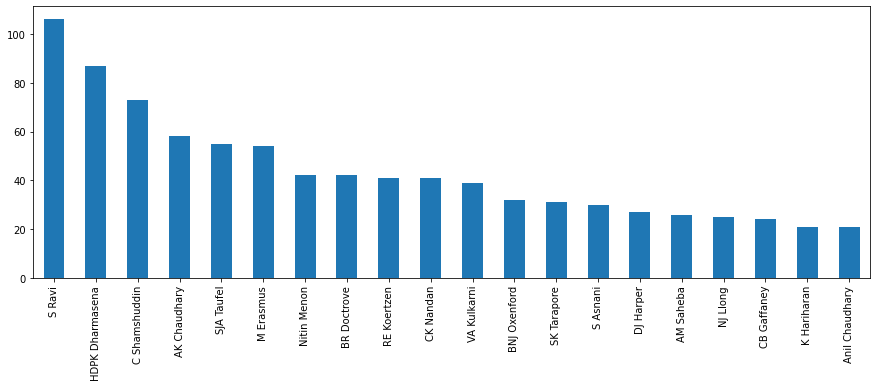

In [ ]:
plt.figure(figsize=(15,5))
umpire.sort_values(ascending=False).head(20).plot.bar()


INFERENCE:
Umpire S Ravi has capped most matches as umpire with 106 matches ,followed by HDPK Dharmasena with 87 matches

**PIE** **CHART**

In [ ]:
#team winning batting first
batting_first=df_matches[df_matches['win_by_runs']!=0]

([<matplotlib.patches.Wedge at 0x7fe6e4481810>,
 [Text(0.9483265621806172, 0.5573838277728304, 'Mumbai Indians'),
  Text(0.02563386044208945, 1.0997012799841763, 'Chennai Super Kings'),
  Text(-0.8677229520271819, 0.6760598187477445, 'Sunrisers Hyderabad'),
  Text(-1.089263137375853, -0.15331607076270107, 'Kings XI Punjab'),
  Text(-0.7426240445397653, -0.8114860001696893, 'Kolkata Knight Riders'),
  Text(-0.087071681803053, -1.096548458677494, 'Royal Challengers Bangalore'),
  Text(0.5351331930271921, -0.9610579929018447, 'Delhi Capitals'),
  Text(0.9377702096019608, -0.5749669851244458, 'Rajasthan Royals'),
  Text(1.0827902674089196, -0.1938175348221124, 'Rising Pune Supergiants'),
  Text(1.0992353332270326, -0.04100831848850801, 'Kochi Tuskers Kerala'),
  Text(1.0999522031572349, -0.010254304927465464, 'Gujarat Lions')],
 [Text(0.5172690339167002, 0.3040275424215438, '16.9%'),
  Text(0.013982105695685153, 0.5998370618095507, '15.4%'),
  Text(-0.4733034283784628, 0.3687599011351333, 

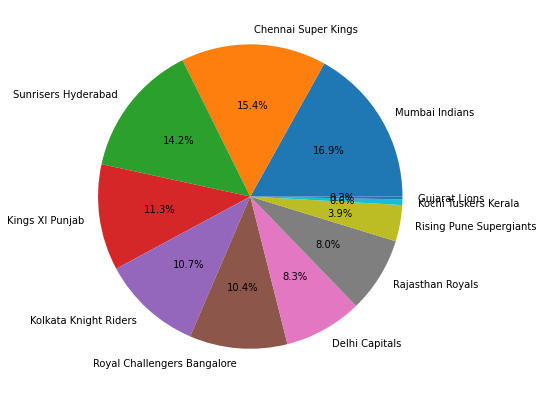

In [ ]:
#making a pie chart for teams winning batting second
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')

In [ ]:
#extracting values for teams winning batting second
batting_second=df_matches[df_matches['win_by_wickets']!=0]

([<matplotlib.patches.Wedge at 0x7fe6e43c0210>,
 [Text(0.9983329623836416, 0.4618780101047276, 'Kolkata Knight Riders'),
  Text(0.34315510477407346, 1.0451050540818827, 'Mumbai Indians'),
  Text(-0.469589129872304, 0.994729133536247, 'Chennai Super Kings'),
  Text(-1.0186933326018242, 0.415046857731256, 'Royal Challengers Bangalore'),
  Text(-1.031049730514229, -0.3833229098378233, 'Delhi Capitals'),
  Text(-0.5152492431956529, -0.9718632709318256, 'Rajasthan Royals'),
  Text(0.2114679624153094, -1.079481959493496, 'Kings XI Punjab'),
  Text(0.798595087518538, -0.756469355751612, 'Sunrisers Hyderabad'),
  Text(1.0310497619173464, -0.3833228253707096, 'Rising Pune Supergiants'),
  Text(1.0868537130148221, -0.1695553198985365, 'Gujarat Lions'),
  Text(1.0994731412635472, -0.03404132253700209, 'Kochi Tuskers Kerala')],
 [Text(0.544545252209259, 0.25193346005712414, '13.8%'),
  Text(0.18717551169494914, 0.5700573022264813, '12.3%'),
  Text(-0.2561395253848931, 0.5425795273834074, '11.8%'),

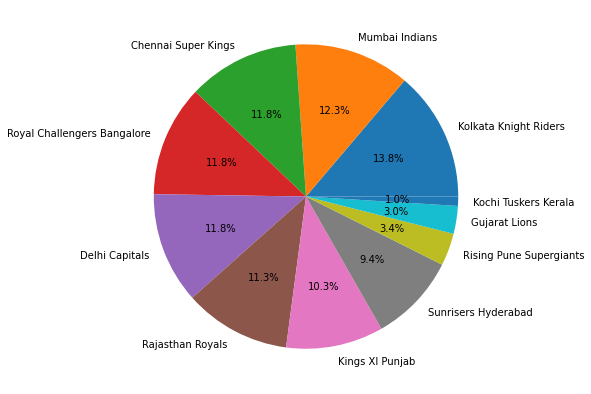

In [ ]:
#piechart for teams winning batting second
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')

In [ ]:
performance=matches.pivot_table(index=['winner','Season'],aggfunc='size')
performance=pd.DataFrame(per)
performance.rename(columns={0:'wins'},inplace=True)
per.reset_index(inplace=True)
CSK=performance[performance['winner'] == 'Chennai Super Kings']
RCB=performance[performance['winner']=='RCB']
MI=performance[performance['winner']=='MI']
KKR=performance[performance['winner']=='KKR']
KXIP=performance[performance['winner']=='KXIP']
RR=performance[performance['winner']=='RR']
DD=performance[performance['winner']=='DD']